## HANDLING OUTLIERS

In [15]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# import data
df = pd.read_csv("data/melb_data.csv")

In [3]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Outlier Detection

In [4]:
# split numeric and object data
df_num = df.select_dtypes(include = ['int64', 'float64'])

In [5]:
# check data
df_num.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000,2.5,3067,2,1,1.0,202,NaN,NaN,-37.7996,144.9984,4019
1,2,1035000,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,4019
2,3,1465000,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,4019
3,3,850000,2.5,3067,3,2,1.0,94,NaN,NaN,-37.7969,144.9969,4019
4,4,1600000,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,4019


In [6]:
# check info
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Price          13580 non-null  int64  
 2   Distance       13580 non-null  float64
 3   Postcode       13580 non-null  int64  
 4   Bedroom2       13580 non-null  int64  
 5   Bathroom       13580 non-null  int64  
 6   Car            13518 non-null  float64
 7   Landsize       13580 non-null  int64  
 8   BuildingArea   7130 non-null   float64
 9   YearBuilt      8205 non-null   float64
 10  Lattitude      13580 non-null  float64
 11  Longtitude     13580 non-null  float64
 12  Propertycount  13580 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 1.3 MB


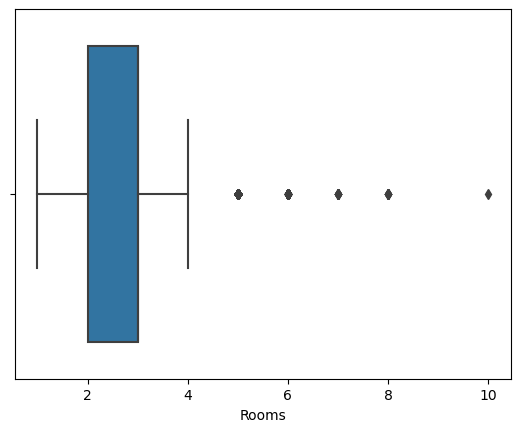

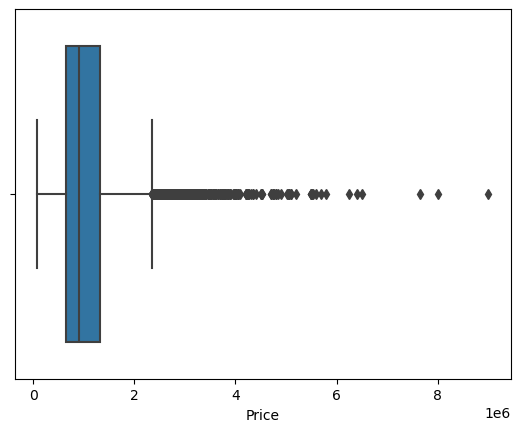

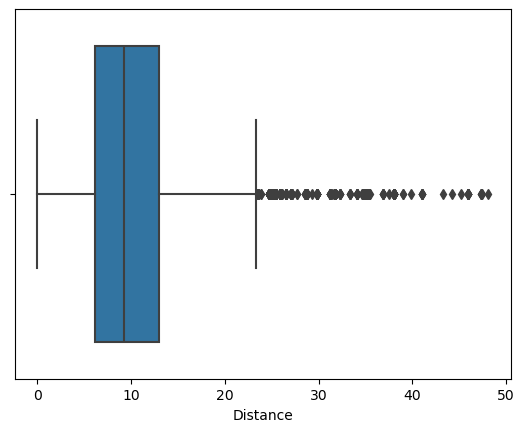

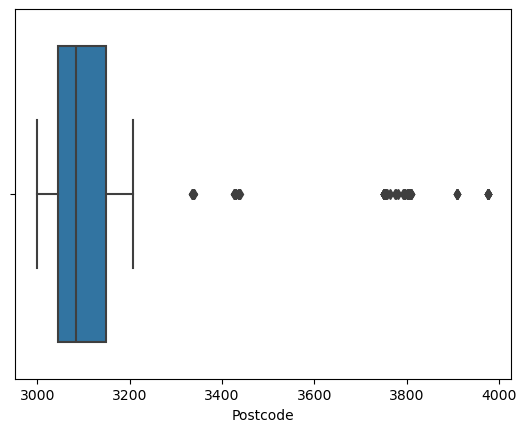

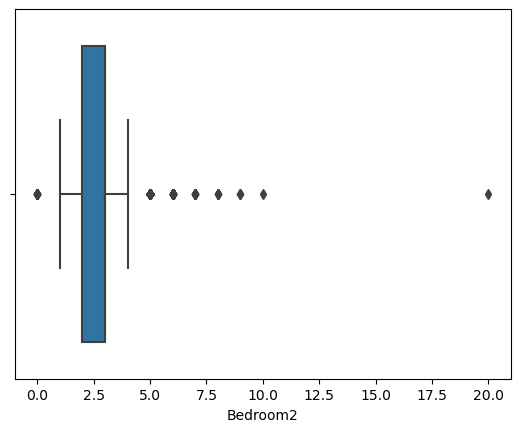

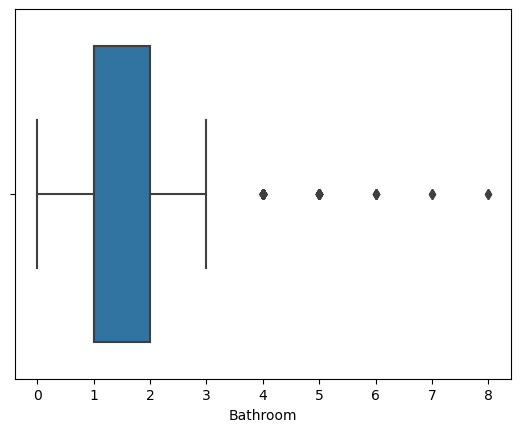

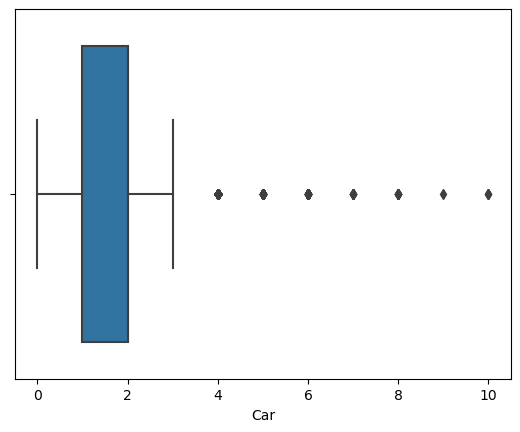

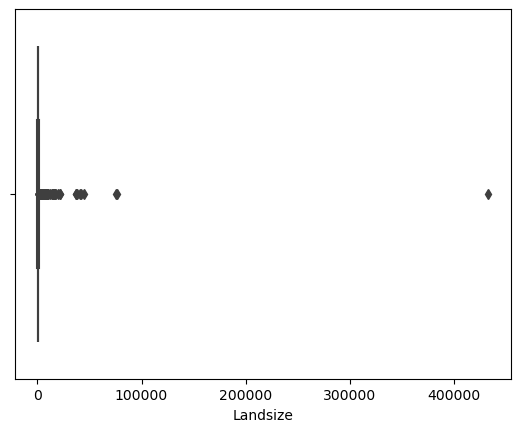

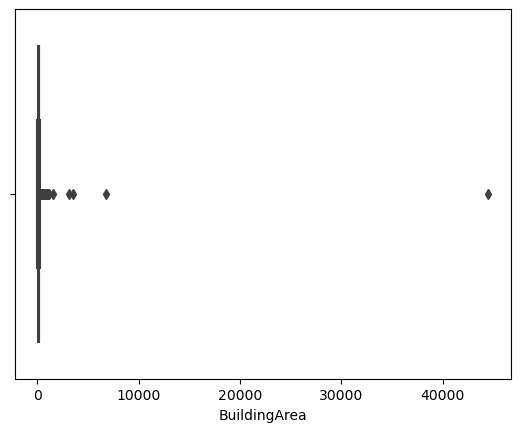

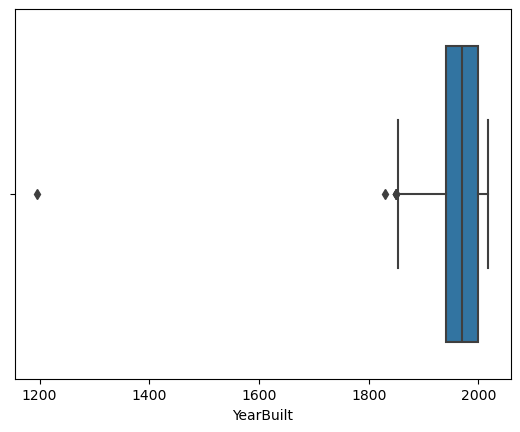

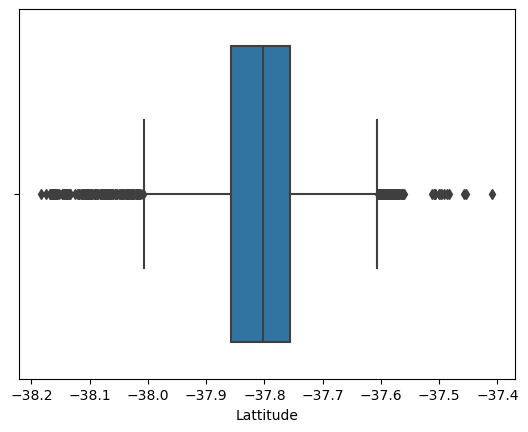

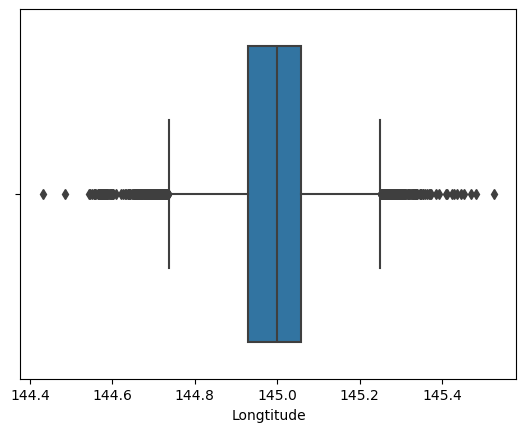

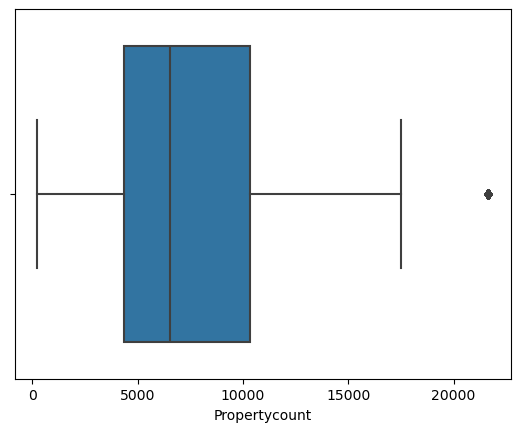

In [7]:
# detection using boxplot (seaborn)
for i in df_num:
    sns.boxplot(data = df_num, x = i)
    plt.show()

In [54]:
# function to find outliers, using numpy
def find_outlier(yourList):
    Q1 = np.quantile(yourList, .25)
    Q3 = np.quantile(yourList, .75)

    IQR = Q3 - Q1
    batas_bawah = Q1 - (IQR * 1.5)
    batas_atas = Q3 + (IQR * 1.5)

    outlier = []
    for i in yourList:
        if i > batas_atas:
            outlier.append(i)
        if i < batas_bawah:
            outlier.append(i)
    return outlier

In [51]:
# to check if the function works
example = [9.0, 3.5, 1.9, 2.9, 5.2, 6.9, 12.8, .178, 1.8, 782.7, 99.8, 8.7]
example = sorted(example, key = float)
find_outlier(example)
# it works

[99.8, 782.7]

In [53]:
# find outliers in distance variable
distance = df_num['Distance'].sort_values().values.tolist()
print(len(find_outlier(distance)))

411


In [13]:
# function to find outliers, using numpy
def find_outlier2(data):

    # hitung nilai Q1 dan Q3
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)

    # hitung nilai IQR
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR

    nilai_min = np.min(data)
    nilai_max = np.max(data)

    low_output = []
    high_output = []

    for i in data:
        if (i < min_IQR):
            low_output.append(i)
        if (i > max_IQR):
            high_output.append(i)

    return print('Lower outlier : ', len(low_output), '|| High outlier :', len(high_output))

In [14]:
# find outliers in distance variable
find_outlier2(distance)

Lower outlier :  0 || High outlier : 411


### z score
![](https://dcx0p3on5z8dw.cloudfront.net/Aakash/s3fs-public/pdf_management_files/target_solutions/z%20score%20image%201.png?YDMmfAIyUTJoFkpxIYTe6NLcBrJrca_W%E2%80%9Dwidth=)

In [17]:
# create a list as example
land = df_num['Landsize'].values.tolist()

In [18]:
# z score check
z = np.abs(stats.zscore(land))

In [58]:
# threshold = 3
print(np.where(z > 3))
print(np.where(z < 3))

(array([  687,  2084,  3750,  3942,  4706,  5194,  5584,  5592,  5694,
        7778,  8241,  8379,  9223, 10045, 10488, 10504, 10819, 11020,
       11371, 11526, 12163, 12504, 12594, 13245], dtype=int64),)
(array([    0,     1,     2, ..., 13577, 13578, 13579], dtype=int64),)


In [20]:
# where is the data?
# finding location
outlier_loc = [687,  2084,  3750,  3942,  4706,  5194,  5584,  5592,  5694,
                7778,  8241,  8379,  9223, 10045, 10488, 10504, 10819, 11020,
               11371, 11526, 12163, 12340, 12504, 12594, 13245]

In [77]:
# finding outliers using loc
df_num.loc[outlier_loc, 'Landsize']

687       75100
2084      15900
3750      15100
3942      37000
4706      21700
5194      41400
5584      14500
5592      17200
5694      17200
7778      15900
8241      21715
8379      17200
9223      37000
10045     38490
10488     14196
10504     76000
10819     17200
11020    433014
11371     40468
11526     16000
12163     17200
12340     12300
12504     20200
12594     14294
13245     44500
Name: Landsize, dtype: int64

### Handling Outliers (not recommended for data analysis)

In [23]:
# create dataframe
houses = pd.DataFrame()
houses['Prices'] = [534433, 392333, 293222, 4322032]
houses['Bathroom'] = [2, 3, 2, 116]
houses['Square_feet'] = [1500, 2500, 1500, 48000]

In [24]:
# check data
houses

,Prices,Bathroom,Square_feet
0,534433,2,1500
1,392333,3,2500
2,293222,2,1500
3,4322032,116,48000


In [26]:
# Drop observations greater than some values
houses_clean = houses[houses['Bathroom'] < 5] # threshold outlier
houses_clean

,Prices,Bathroom,Square_feet
0,534433,2,1500
1,392333,3,2500
2,293222,2,1500


### Drop outlier using statistical method

In [31]:
# locating index using z score
z = np.abs(stats.zscore(land))

In [32]:
# dropped outlier
outlier_loc = np.where(z > 2.5)[0].tolist()
df_dropped_outlier = df.loc[~df.index.isin(outlier_loc)]

[687,
 2084,
 3750,
 3942,
 4706,
 5194,
 5584,
 5592,
 5694,
 7778,
 8241,
 8379,
 9223,
 10045,
 10488,
 10504,
 10819,
 11020,
 11371,
 11526,
 12163,
 12340,
 12504,
 12594,
 13245]

In [33]:
# detect using IQR
Q1 = np.quantile(df_num["Landsize"], .25)
Q3 = np.quantile(df_num["Landsize"], .75)

IQR = Q3 - Q1
min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

In [36]:
# remove outliers based on IQR
outlier_removed = df_num[(df_num['Landsize']  < min_IQR) | (df_num['Landsize']  > max_IQR)]

In [37]:
# show data
outlier_removed.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
22,3,1090000,2.5,3067,3,2,2.0,4290,27.0,NaN,-37.8078,144.9965,4019
234,4,3000000,6.3,3143,4,2,2.0,1581,NaN,1934.0,-37.8580,145.0111,4836
236,3,735000,6.3,3143,3,2,1.0,2113,14.0,1970.0,-37.8543,145.0262,4836
251,6,5525000,6.3,3143,5,3,4.0,1491,516.0,1935.0,-37.8602,145.0130,4836
266,2,710000,6.3,3143,2,1,1.0,2471,80.0,1970.0,-37.8573,145.0186,4836


### Capping

In [38]:
# example capping
upper_limit = df['Landsize'].mean() + 3*df['Landsize'].std()
lower_limit = df['Landsize'].mean() - 3*df['Landsize'].std()

print(round(upper_limit), round(lower_limit))

12530 -11414


In [39]:
# copy df
df_num2 = df_num.copy()

In [40]:
# check outliers based on upper limit
df_num2[df_num2['Landsize'] > upper_limit]

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
687,3,2000000,9.2,3104,3,1,2.0,75100,NaN,NaN,-37.80020,145.07000,7809
2084,3,950000,1.6,3066,3,2,1.0,15900,NaN,NaN,-37.80350,144.98500,4553
3750,2,352500,9.2,3012,2,1,1.0,15100,66.0,2012.0,-37.77950,144.87290,3873
3942,2,495000,8.7,3032,2,2,2.0,37000,NaN,NaN,-37.77520,144.89250,4918
4706,2,1340000,3.8,3207,2,2,2.0,21700,NaN,2000.0,-37.84240,144.94490,8648
5194,3,572000,11.2,3073,3,1,2.0,41400,NaN,NaN,-37.71040,145.02570,21650
5584,1,315000,3.3,3141,1,1,0.0,14500,NaN,2011.0,-37.83720,144.99630,14887
5592,2,978500,3.3,3141,2,2,2.0,17200,NaN,2000.0,-37.83610,144.99660,14887
5694,2,827000,3.3,3141,2,2,2.0,17200,NaN,2000.0,-37.83610,144.99660,14887
7778,2,945000,1.6,3066,2,1,1.0,15900,98.0,1880.0,-37.80350,144.98500,4553


In [41]:
# cap lansize based on upper limit
df_num2[df_num2['Landsize'] > upper_limit] = upper_limit

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11624\1443907746.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12530.423849983952' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_num2[df_num2['Landsize'] > upper_limit] = upper_limit


In [42]:
# check outliers based on upper limit after capping
df_num2[df_num2['Landsize'] > upper_limit]
# then repeat the same thing with the lower limit

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount


### References
1. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
2. https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
3. https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
4. https://www.geeksforgeeks.org/machine-learning-outlier/
5. https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/